<a href="https://colab.research.google.com/github/gulbetulsrky/my_assignments/blob/main/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("Churn_Modelling.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

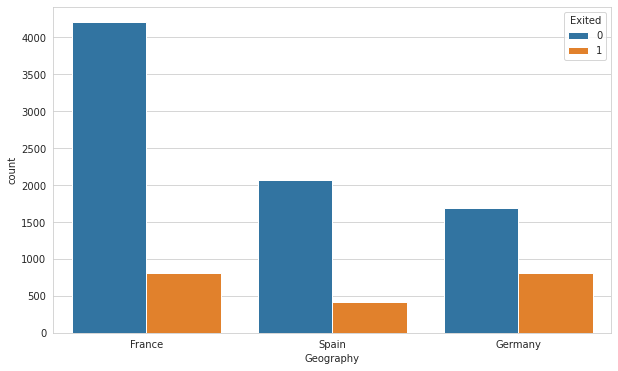

In [9]:
sns.countplot(df.Geography, hue=df.Exited)

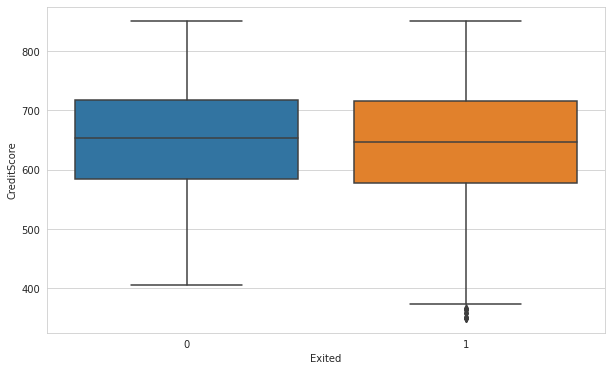

In [10]:
sns.boxplot(df.Exited, df.CreditScore)

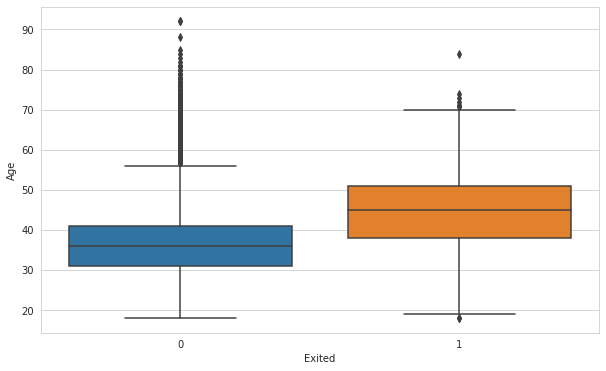

In [11]:
sns.boxplot(df.Exited, df.Age)

In [12]:
df.Age.describe()

count   10000.000
mean       38.922
std        10.488
min        18.000
25%        32.000
50%        37.000
75%        44.000
max        92.000
Name: Age, dtype: float64

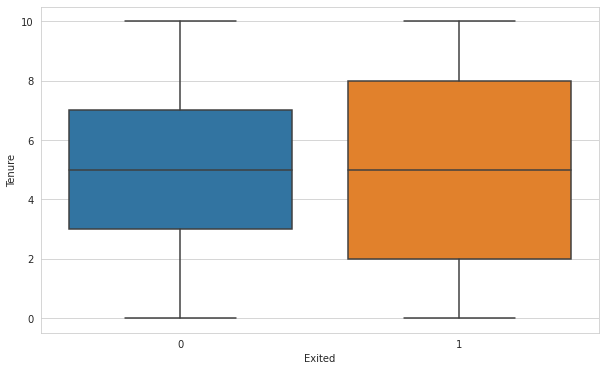

In [13]:
sns.boxplot(df.Exited, df.Tenure)

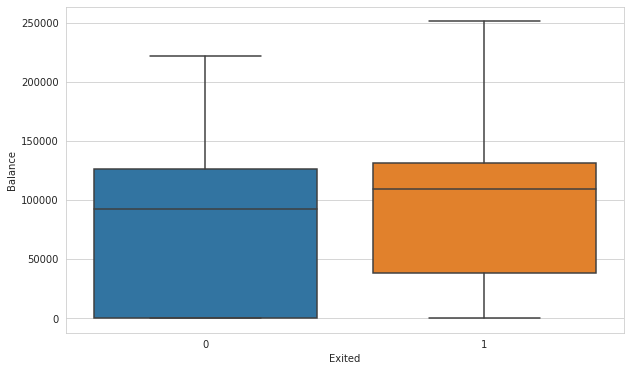

In [14]:
sns.boxplot(df.Exited, df.Balance)

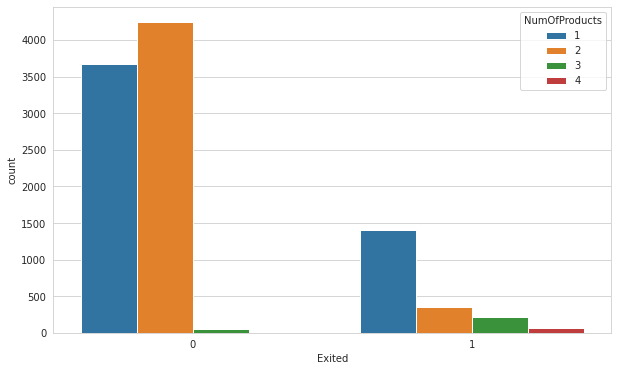

In [15]:
sns.countplot(df.Exited, hue=df.NumOfProducts)

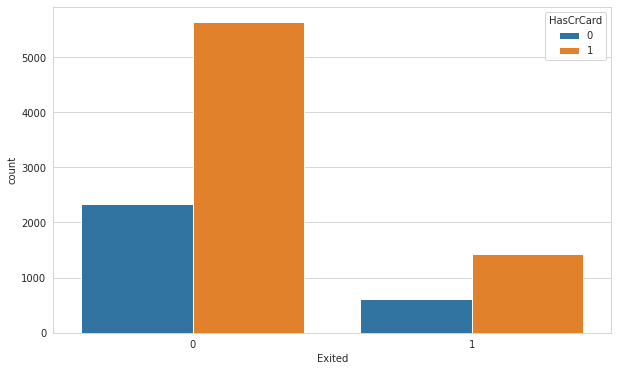

In [16]:
sns.countplot(df.Exited, hue=df.HasCrCard)

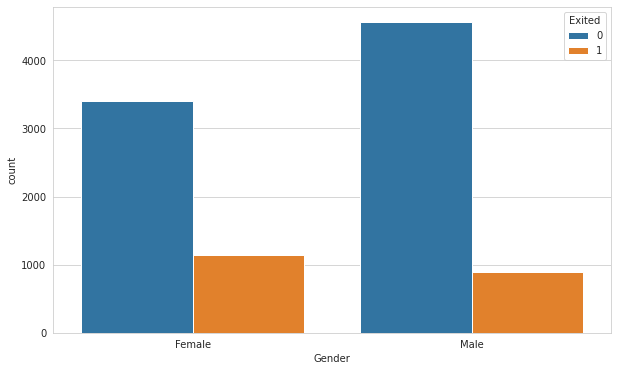

In [17]:
sns.countplot(df.Gender, hue=df.Exited)

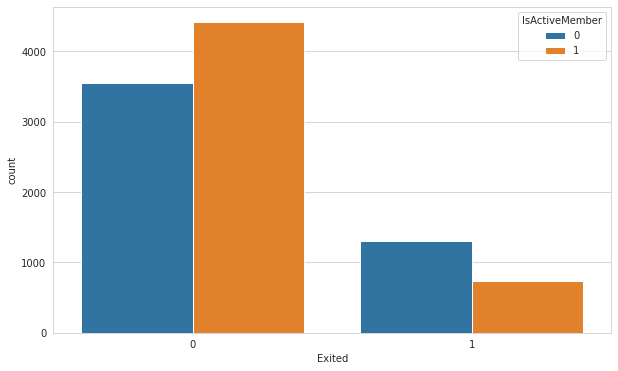

In [18]:
sns.countplot(df.Exited, hue=df.IsActiveMember)

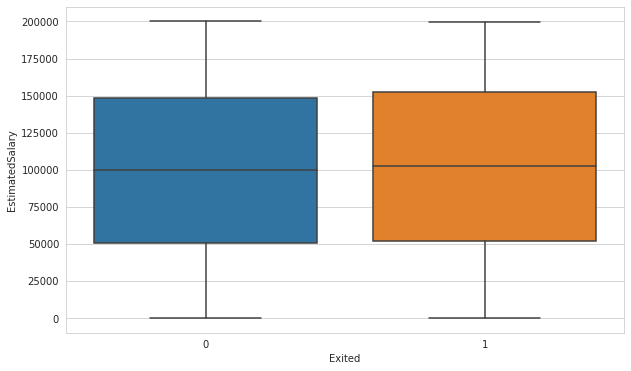

In [19]:
sns.boxplot(df.Exited, df.EstimatedSalary)

In [20]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

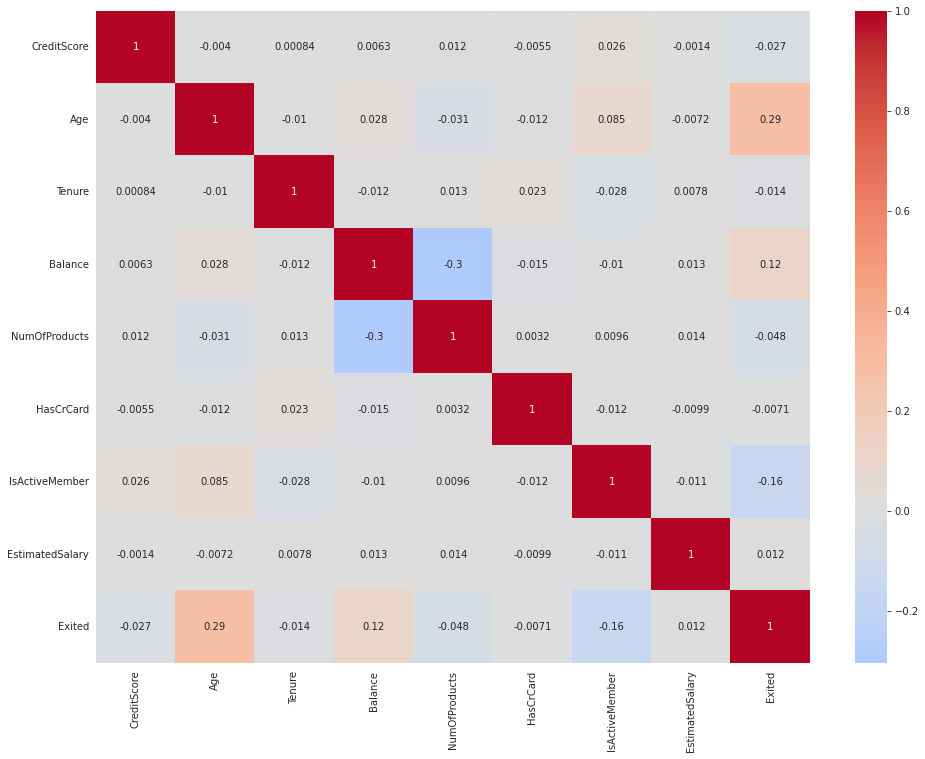

In [21]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), center=0, cmap="coolwarm", annot=True)

In [22]:
df = pd.get_dummies(df, drop_first=True)

In [23]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0,0,0,1
9996,516,35,10,57369.610,1,1,1,101699.770,0,0,0,1
9997,709,36,7,0.000,1,0,1,42085.580,1,0,0,0
9998,772,42,3,75075.310,2,1,0,92888.520,1,1,0,1


# Preprocessing of Data
- Train | Test Split, Scalling

In [24]:
X = df.drop(columns="Exited")
y = df.Exited

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [26]:
seed = 101

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [28]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [30]:
X_train.shape

(7000, 11)

In [31]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(6, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [32]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, batch_size = 35, epochs = 1000, verbose=1)

Epoch 1/1000
160/160 [==============================] - 4s 4ms/step - loss: 0.5567 - accuracy: 0.7454 - val_loss: 0.4891 - val_accuracy: 0.8100
Epoch 2/1000
160/160 [==============================] - 0s 3ms/step - loss: 0.4924 - accuracy: 0.7959 - val_loss: 0.4777 - val_accuracy: 0.8079
Epoch 3/1000
160/160 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.7964 - val_loss: 0.4704 - val_accuracy: 0.8079
Epoch 4/1000
160/160 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.7979 - val_loss: 0.4654 - val_accuracy: 0.8093
Epoch 5/1000
160/160 [==============================] - 1s 5ms/step - loss: 0.4719 - accuracy: 0.7991 - val_loss: 0.4602 - val_accuracy: 0.8114
Epoch 6/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.4673 - accuracy: 0.8002 - val_loss: 0.4560 - val_accuracy: 0.8121
Epoch 7/1000
160/160 [==============================] - 0s 3ms/step - loss: 0.4632 - accuracy: 0.8023 - val_loss: 0.4513 - val_accuracy:

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [34]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.557,0.745,0.489,0.810
1,0.492,0.796,0.478,0.808
2,0.484,0.796,0.470,0.808
3,0.477,0.798,0.465,0.809
4,0.472,0.799,0.460,0.811


In [35]:
model1 = Sequential()

model1.add(Dense(9, activation = "relu", input_dim = X_train.shape[1]))
model1.add(Dense(6, activation = "relu"))
model1.add(Dense(6, activation = "relu"))
model1.add(Dense(1, activation = "sigmoid"))

model1.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [36]:
model1.fit(x = X_train, y = y_train, validation_split = 0.2, batch_size = 35, epochs = 1000, verbose=1)

Epoch 1/1000
160/160 [==============================] - 1s 4ms/step - loss: 0.5312 - accuracy: 0.7650 - val_loss: 0.4690 - val_accuracy: 0.8057
Epoch 2/1000
160/160 [==============================] - 0s 3ms/step - loss: 0.4745 - accuracy: 0.7959 - val_loss: 0.4611 - val_accuracy: 0.8057
Epoch 3/1000
160/160 [==============================] - 0s 3ms/step - loss: 0.4651 - accuracy: 0.7955 - val_loss: 0.4545 - val_accuracy: 0.8050
Epoch 4/1000
160/160 [==============================] - 0s 3ms/step - loss: 0.4581 - accuracy: 0.7973 - val_loss: 0.4481 - val_accuracy: 0.8050
Epoch 5/1000
160/160 [==============================] - 0s 3ms/step - loss: 0.4539 - accuracy: 0.7970 - val_loss: 0.4443 - val_accuracy: 0.8079
Epoch 6/1000
160/160 [==============================] - 0s 3ms/step - loss: 0.4486 - accuracy: 0.7998 - val_loss: 0.4389 - val_accuracy: 0.8164
Epoch 7/1000
160/160 [==============================] - 0s 3ms/step - loss: 0.4444 - accuracy: 0.8037 - val_loss: 0.4325 - val_accuracy:

In [37]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 9)                 108       
                                                                 
 dense_3 (Dense)             (None, 6)                 60        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [38]:
loss1_df = pd.DataFrame(model1.history.history)
loss1_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.531,0.765,0.469,0.806
1,0.474,0.796,0.461,0.806
2,0.465,0.796,0.454,0.805
3,0.458,0.797,0.448,0.805
4,0.454,0.797,0.444,0.808


In [39]:
join_df = loss_df.join(loss1_df, rsuffix="1")
join_df

,loss,accuracy,val_loss,val_accuracy,loss1,accuracy1,val_loss1,val_accuracy1
0,0.557,0.745,0.489,0.810,0.531,0.765,0.469,0.806
1,0.492,0.796,0.478,0.808,0.474,0.796,0.461,0.806
2,0.484,0.796,0.470,0.808,0.465,0.796,0.454,0.805
3,0.477,0.798,0.465,0.809,0.458,0.797,0.448,0.805
4,0.472,0.799,0.460,0.811,0.454,0.797,0.444,0.808
...,...,...,...,...,...,...,...,...
995,0.341,0.861,0.343,0.862,0.316,0.866,0.359,0.854
996,0.341,0.861,0.345,0.861,0.316,0.867,0.362,0.851
997,0.341,0.859,0.343,0.861,0.316,0.868,0.362,0.851
998,0.341,0.859,0.345,0.861,0.316,0.869,0.366,0.856


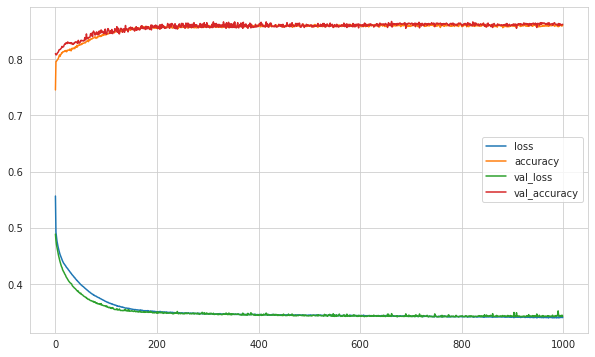

In [40]:
loss_df.plot()  # loss and val_loss are like the same. there is no significant difference. so there isn't overfitting.

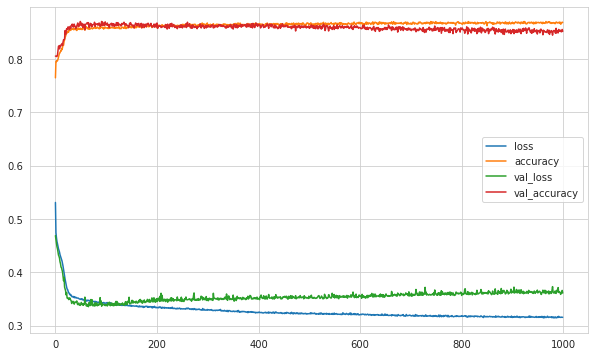

In [41]:
loss1_df.plot() # loss is lower then val_loss. there can be overfitting.

In [42]:
# I prefer the model with one hidden layer. 
# because it has lower val_loss even though higher loss compared with the model with 3 hidden layers.

In [43]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3278960883617401
accuracy :  0.8606666922569275


In [44]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2282   96]
 [ 322  300]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2378
           1       0.76      0.48      0.59       622

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [45]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [46]:
y_test.value_counts()

0    2378
1     622
Name: Exited, dtype: int64

In [47]:
# fit model
weights = {0:1, 1:4}
model.fit(X_train, y_train, validation_split = 0.2, batch_size = 35, class_weight=weights, epochs=1000, verbose=0)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [48]:
lossweight_df = pd.DataFrame(model.history.history)
lossweight_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.773,0.775,0.432,0.791
1,0.757,0.778,0.480,0.752
2,0.752,0.776,0.414,0.809
3,0.751,0.783,0.476,0.758
4,0.751,0.775,0.433,0.785


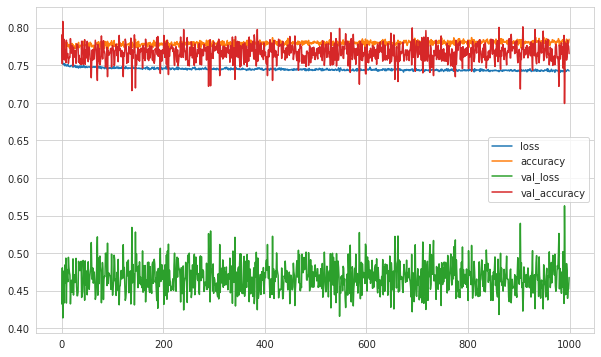

In [49]:
lossweight_df.plot()

In [50]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.44370394945144653
accuracy :  0.7883333563804626


In [51]:

y_pred = model.predict(X_test) > 0.5


In [52]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1873  505]
 [ 130  492]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      2378
           1       0.49      0.79      0.61       622

    accuracy                           0.79      3000
   macro avg       0.71      0.79      0.73      3000
weighted avg       0.84      0.79      0.80      3000



In [53]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [54]:
scores = roc_auc_score(y_test, y_pred)
scores

0.7893167270180298

In [55]:
roc_curve(y_test, y_pred)

(array([0.        , 0.21236333, 1.        ]),
 array([0.        , 0.79099678, 1.        ]),
 array([2, 1, 0]))

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [56]:
from tensorflow.keras.optimizers import Adam

In [57]:
model = Sequential()

model.add(Dense(6, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [58]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, batch_size = 35, epochs = 1000, verbose=0)

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail()

,loss,accuracy,val_loss,val_accuracy
995,0.344,0.857,0.336,0.868
996,0.344,0.857,0.338,0.869
997,0.343,0.858,0.337,0.864
998,0.344,0.860,0.343,0.856
999,0.343,0.860,0.338,0.869


In [60]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.32438525557518005
accuracy :  0.8629999756813049


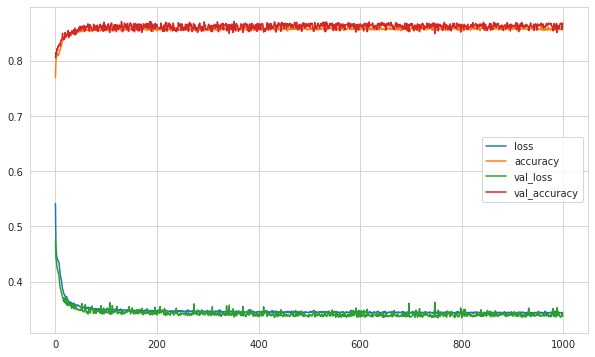

In [61]:
loss_df.plot()

In [62]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2277  101]
 [ 310  312]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2378
           1       0.76      0.50      0.60       622

    accuracy                           0.86      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000



In [63]:
model = Sequential()

model.add(Dense(6, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.01)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [64]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, batch_size = 35, epochs = 1000, verbose=0)

In [65]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail()

,loss,accuracy,val_loss,val_accuracy
995,0.345,0.859,0.336,0.866
996,0.346,0.858,0.341,0.864
997,0.345,0.859,0.339,0.867
998,0.345,0.859,0.337,0.864
999,0.345,0.860,0.341,0.866


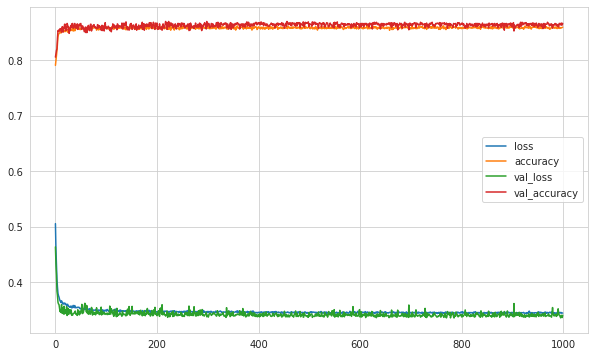

In [66]:
loss_df.plot()

In [67]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2276  102]
 [ 310  312]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2378
           1       0.75      0.50      0.60       622

    accuracy                           0.86      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000



### Add Dropout Layer

In [68]:
from tensorflow.keras.layers import Dropout

In [69]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(6, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [70]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, batch_size = 35, epochs = 1000, verbose=0)

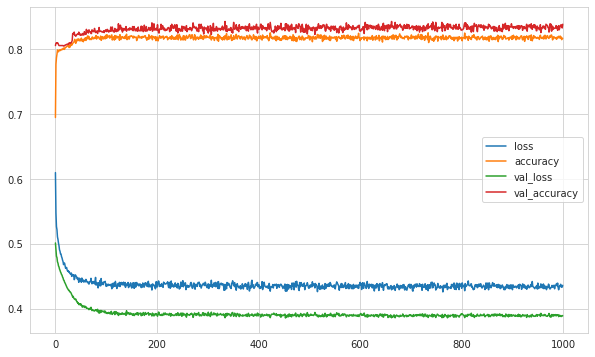

In [71]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [72]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2363   15]
 [ 475  147]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.91      2378
           1       0.91      0.24      0.38       622

    accuracy                           0.84      3000
   macro avg       0.87      0.62      0.64      3000
weighted avg       0.85      0.84      0.80      3000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [73]:
from tensorflow.keras.callbacks import EarlyStopping

In [74]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(6, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [75]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [76]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, batch_size = 35, epochs = 1000, verbose = 0,
          callbacks = [early_stop])

Restoring model weights from the end of the best epoch: 213.
Epoch 228: early stopping


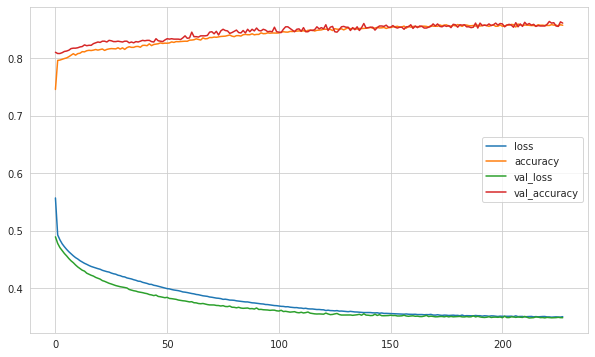

In [77]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [78]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2281   97]
 [ 332  290]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2378
           1       0.75      0.47      0.57       622

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000



# Final Model and Model Deployment

In [79]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [80]:
model.save('model_churn.h5')

## Prediction

In [81]:
#from tensorflow.keras.models import load_model
#model = load_model('model_cancer.h5')
#scaler = pickle.load(open("scaler_cancer", "rb"))

In [90]:
customer = df.drop(columns="Exited").iloc[2:3,:]

In [91]:
customer = scaler.transform(customer)
customer

array([[0.304     , 0.32432432, 0.8       , 0.63635718, 0.66666667,
        1.        , 0.        , 0.56971629, 0.        , 0.        ,
        0.        ]])

In [92]:
(model.predict(customer) > 0.5).astype("int32")

array([[1]], dtype=int32)

In [95]:
df["Exited"].iloc[2]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___